In [1]:
#Holiday Package Prediction
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\Machine learning\ML Programs\datsets\Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
#Data cleaning
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df["Gender"] = df.Gender.replace("Fe Male", "Female")
df.MaritalStatus = df.MaritalStatus.replace("Single","Unmarried")

In [5]:
feature_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [6]:
#statistics on numerical columns (Null cols)
df[feature_with_na].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [7]:
df.Age.fillna(df.Age.median(), inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\2661029692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)


In [8]:
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\794420813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)


In [9]:
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\4262229188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)


In [10]:
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0] , inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\774658820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0] , inplace=True)


In [11]:
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\2646991968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)


In [12]:
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\1774608560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)


In [13]:
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\1911819960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)


In [14]:
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

C:\Users\ajayp\AppData\Local\Temp\ipykernel_6464\2741754935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)


In [15]:
#Imputing null values
# df.Age.fillna(df.Age.median(), inplace=True)

# df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
# # df.DurationOfPitch.fillna(df.DurationOfPitch.median(), in)

# df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [16]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [18]:
df.drop("CustomerID",inplace=True, axis=1)

In [19]:
#Feature Engineering
df['TotalVisiting'] = df.NumberOfPersonVisiting + df.NumberOfChildrenVisiting
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], inplace=True, axis=1)

In [20]:
num_features= [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical feature is:',len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical feature is: 12
Num of Categorical Features : 6
Num of Discrete Features : 9
Num of Continuous Features : 3


In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
#Train test split
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df.ProdTaken

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [24]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns
print(cat_features)
print(num_features)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')


In [25]:
##applying transformation in training(fit transformation)
X_train = preprocessor.fit_transform(X_train)
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [26]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [27]:
pd.DataFrame(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
#Addaboost Classifier Training
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [29]:
models = {
    "Adaboost": AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost
Model performance for Training set
- Accuracy: 0.8565
- F1 score: 0.8365
- Precision: 0.7308
- Recall: 0.3649
- Roc Auc Score: 0.6670
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.8115
- Precision: 0.6630
- Recall: 0.3194
- Roc Auc Score: 0.6400


GradientBoost
Model performance for Training set
- Accuracy: 0.8939
- F1 score: 0.8819
- Precision: 0.8756
- Recall: 0.5021
- Roc Auc Score: 0.7429
----------------------------------
Model performance for Test set
- Accuracy: 0.8589
- F1 score: 0.8398
- Precision: 0.7732
- Recall: 0.3927
- Roc Auc Score: 0.6824




In [30]:
##Hyperparameter Tarining
gradient_params = {
    'loss':['log_loss', 'exponential'],
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000],
    'max_depth':[5,8,15,None,10]
}

In [31]:
gradient_params

{'loss': ['log_loss', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000],
 'max_depth': [5, 8, 15, None, 10]}

In [64]:
#model list for hyperparameter tunning
randomcv_models = [
    ("GC", GradientBoostingClassifier(), gradient_params),
]

In [66]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100,cv=3,verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_


for model_name in model_param:
    print(f"-----------Best Params for {model_name}-------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----------Best Params for GC-------------
{'n_estimators': 1000, 'min_samples_split': 15, 'max_depth': None, 'loss': 'log_loss', 'criterion': 'squared_error'}


In [72]:

from xgboost import XGBClassifier
xgb_model = XGBClassifier(tree_method='gpu_hist')  # uses GPU
models = {
    "Gradient Boost": GradientBoostingClassifier(n_estimators=1000,min_samples_split=15,max_depth=None,loss='log_loss',criterion='squared_error')
} 
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #Train model

    #make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    #Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training Set')
    print("- Accuarcy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print('- precision: {:.4f}'.format(model_train_precision))
    print("- Roc Auc Score {:.4f}:".format(model_train_rocauc_score))


    print('-'*35)

    print('Model Performance for Test Set')
    print("- Accuarcy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print('- precision: {:.4f}'.format(model_test_precision))
    print("- Roc Auc Score {:.4f}:".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Gradient Boost
Model performance for Training Set
- Accuarcy: 1.0000
- F1 score: 1.0000
- precision: 1.0000
- Roc Auc Score 1.0000:
-----------------------------------
Model Performance for Test Set
- Accuarcy: 0.9550
- F1 score: 0.9535
- precision: 0.9565
- Roc Auc Score 0.8987:




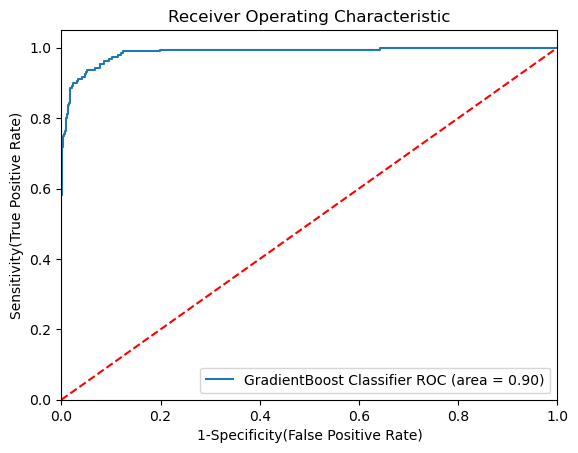

In [74]:
##Plot Roc Auc Curve
from sklearn.metrics import roc_curve

plt.figure()

auc_models = [
    {
        'label':'GradientBoost Classifier',
        'model': GradientBoostingClassifier(n_estimators=1000,min_samples_split=15,max_depth=None,loss='log_loss',criterion='squared_error'),
        'auc':0.8987
    }
]

#create loop through all model
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    #compute false positive rate, and True positive rate
    fpr, tpr, thresholads = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    #calculate area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()